In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load in data

In [10]:
file_path = "../Week-6/myLearnerData.json"
data = pd.read_json(file_path)["input"].values
data = np.array([np.array(i) for i in data])

In [66]:
print(data.shape)
data[:1]

(99, 51)


array([[3.30569080e+02, 2.85654696e+02, 9.97550905e-01, 3.59574873e+02,
        2.68767197e+02, 9.98287082e-01, 3.05536178e+02, 2.62172313e+02,
        9.99055564e-01, 3.81875855e+02, 2.85302861e+02, 9.34920967e-01,
        2.81128039e+02, 2.84456112e+02, 9.59715009e-01, 4.26768093e+02,
        4.51143034e+02, 9.54503477e-01, 1.77739073e+02, 4.58413846e+02,
        9.77872729e-01, 4.45894266e+02, 5.68053908e+02, 3.84043530e-02,
        1.41117708e+02, 5.14196344e+02, 2.80673318e-02, 3.91430164e+02,
        4.74406359e+02, 4.82504368e-02, 1.50708573e+02, 5.13400937e+02,
        1.58868060e-02, 4.22877624e+02, 5.21550004e+02, 9.23259184e-03,
        2.20498721e+02, 5.24681697e+02, 7.67461024e-03, 4.24683140e+02,
        4.91187452e+02, 9.83555336e-03, 1.69676556e+02, 4.76921108e+02,
        4.28159013e-02, 4.10818365e+02, 5.02245618e+02, 1.09298085e-03,
        1.47933067e+02, 5.09541370e+02, 2.86504626e-03]])

### Do you need to trim off any data from the start or end of the recording?

In [19]:
start = 0
end = -1
body_data = pd.DataFrame(data[:,1][start:end])
body_data

,0
0,285.654696
1,284.044471
2,286.863166
3,287.547152
4,287.021606
...,...
93,299.608502
94,293.518544
95,289.243530
96,293.677808


### Rolling Average


<AxesSubplot:>

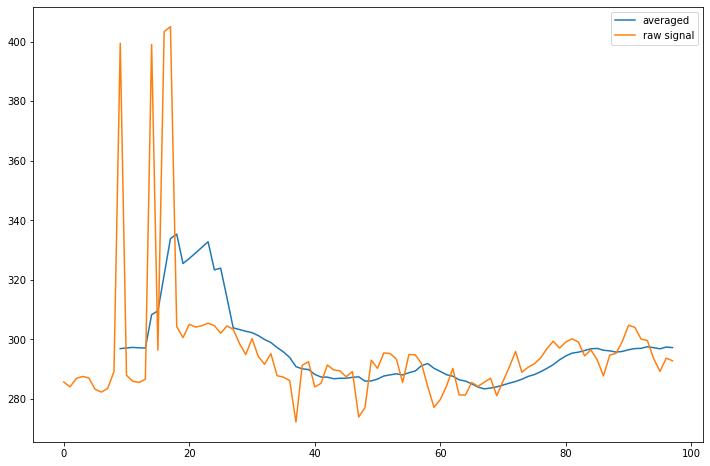

In [44]:
toPlot = pd.DataFrame([])

#Change window size
av_win = 10

toPlot["averaged"] = body_data.rolling(av_win).mean()[0]
toPlot["raw signal"] = body_data
toPlot.plot(figsize=(12,8))

### Standard Deviation 

<AxesSubplot:>

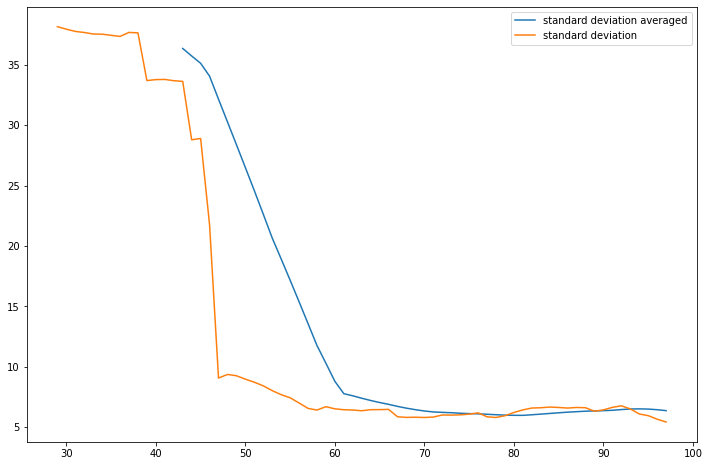

In [49]:
toPlot = pd.DataFrame([])

#Window for measuring standard deviation 
std_win = 30
#Window for rolling average on standard deviation
av_win = 15

toPlot["standard deviation averaged"] = body_data.rolling(std_win).std().rolling(av_win).mean()[0]
toPlot["standard deviation"] = body_data.rolling(std_win).std()[0]
toPlot.plot(figsize=(12,8))

,0
0,NaN
1,-1.610225
2,2.818695
3,0.683986
4,-0.525546
...,...
93,-0.453282
94,-6.089958
95,-4.275014
96,4.434278


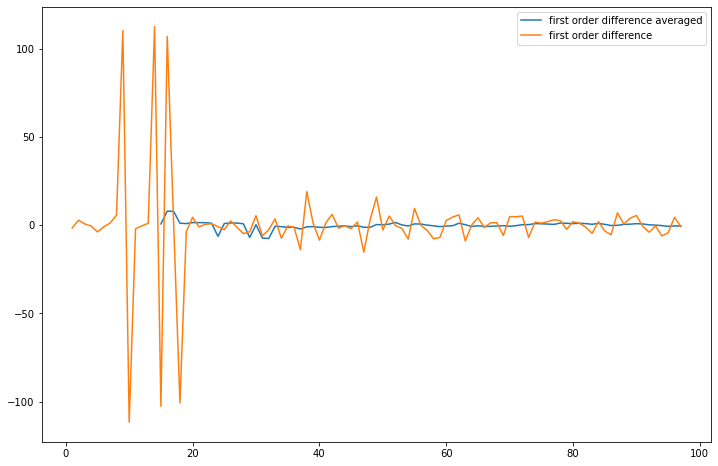

In [83]:
toPlot = pd.DataFrame([])

#Window for rolling average on first order difference
av_win = 15

toPlot["first order difference averaged"] = body_data.diff(1).rolling(av_win).mean()[0]
toPlot["first order difference"] = body_data.diff(1)[0]
toPlot.plot(figsize=(12,8)) 

body_data.diff()